## Exploring Transformer Architectures

## The RNN Limitation
The RNN layer (LSTM, or GRU, etc.) takes in a context window of a defined size as input and encodes all of it into a single vector. This bottleneck vector needs to capture a lot of information in itself before the decoding stage can use it to start generating the next token. To enhance performance of sequence to sequence tasks a typical Encoder-Decoder architecture is the go-to choice.

<img src="./assets/encoder_decoder_notebook_3.png">

Let us consider the case of **Machine Translation**, i.e. translation of English to Spanish (or any other language).

In a typical __Encoder-Decoder__ architecture, the Encoder takes in the input text in English as input and prepares a condensed vector representation of the whole input. Typically termed as bottleneck features. The Decoder then uses these features to generate the translated text in Spanish.

While this architecture and its variants worked wonders, they had issues. Issues such as inability handle longer input sequences, cases where there is not a one to one mapping between input vs output language and so on.

To handle these issues, __Vasvani et. al.__ in their now famouly titled paper __Attention Is All You Need__ build up on the concepts of attention. The main highlight of this work was the Transformer architecture. Transformers were shown to present state of the art results on multiple benchmarks without using any recurrence or convolutional components.

## Transformers
- The transformer architecture was presented in the seminal paper __Attention is All You Need__ by Vaswani et al. back in 2017
- A transformer is a __recurrence-__ and __convolution-free__ attention-based encoder-decoder architecture
- Introduced the concept of multi-head attention and positional encodings
- Also revolutionalised Computer Vision domain (see ViT)


<img src="./assets/transformer_arch_notebook_3.png">

## Attention is All you Need ⚠️


### Attention to the Rescue
Attention is one of the most powerful concepts in the deep learning space that really changed the game. The core idea behind the attention mechanism is to make use of all interim hidden states of the RNN to decide which one to focus upon before it is used by the decoding stage. 

### Contextual Embeddings
The [TagLM architecture by Peters et al. in 2017](https://arxiv.org/abs/1705.00108) was one of the first works that provided an insight into how we could combine __pre-trained word embeddings__ with a __pre-trained neural language model__ to generate __context-aware embeddings__ for downstream NLP tasks.

The big breakthrough that changed the NLP landscape came in the form of __ELMo, or Embeddings from Language Models__. The ELMo architecture was presented by Peters et al. in their work titled [__Deep Contextualized Word Representations in 2018__](https://arxiv.org/abs/1802.05365). Without going into too much detail, the main highlights of the ELMo architecture were:

- The model used a bi-LSTM-based language model.
- Character CNNs were used to generate embeddings, in place of pre-trained word vectors, which made use of huge 4096 LSTM units but transformed into smaller 512-sized vectors using feedforward layers.
- The main innovation was to make use of all the hidden bi-LSTM layers for generating input representation. Unlike previous works, where only the final LSTM layer was used to fetch the representation of the input, this work took a weighted average of all the hidden layers' hidden states. This helped the model learn contextual word embeddings where each layer contributed to things like syntax and semantics.

### Self-Attention
- Self-attention was proposed by Cheng et al. in their paper titled Long Short-Term Memory Networks for Machine Reading in 2016
- Self-attention enables a model to learn the correlation between the current token (character or word or sentence, etc.) and its context window. In other words, it is an attention mechanism that relates different positions of a given sequence so as to generate a representation of the same sequence

### Multi-head Attention
- Multi-head attention extends the self-attention mechanism by performing multiple parallel self-attention operations, each focusing on different learned linear projections of the input. Multiple attention heads allow the model to capture different types of relationships and learn more fine-grained representations (eg: grammar, context, dependency, etc.)

<img src="./assets/multihead_attention_notebook_3.png">

> Source: [Vasvani et. al.](https://arxiv.org/pdf/1706.03762.pdf)

### Positional Encoding
Positional encoding is a technique used to incorporate the position of each token in the input sequence. It provides the model with information about the token's position without relying solely on the order of tokens.
This additional aspect was required because transformers do not have the natural sequential setup of RNNs. In order to provide positional context, any encoding system should ideally have the following properties:

- It should output a unique encoding for each time-step (word’s position in a sentence)
- Distance between any two time-steps should be consistent across sentences with different lengths.
- Our model should generalize to longer sentences without any efforts. Its values should be bounded.
- It must be deterministic.

<img src="./assets/positional_emb_notebook_3.png">



### References
- [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)

In [1]:
import numpy as np
import scienceplots
from matplotlib import pyplot as plt
plt.style.use(['science','no-latex'])

In [2]:
def positional_encoding(pos,i,d_model,is_even=True):
    """
    Method to generate positional encoding value
    :param pos: position of the input
    :param i: i-th dimension of the embedding
    :param d_model: length of the embedding vector
    :param is_even: if the position of the input is even or odd
    """
    input_val = pos/np.power(10000,(2*i)/d_model)
    if is_even:
        return np.sin(input_val)
    else:
        return np.cos(input_val)

In [3]:
# input parameters for visualisations
pos = np.arange(0,10,0.1) #10 input words, stepping at 0.1 for smoothness only
dimensions = np.arange(0,512) # dimensionality of the positional encoding (same as d_model by default)
d_model = 512 # length of embedding vector

In [4]:
# positional encoding for even positions
even_pos_emb = [positional_encoding(pos,i,d_model) for i in dimensions] 

# positional encoding for off positions
odd_pos_emb = #TODO: prepare positional embeddings for odd positions

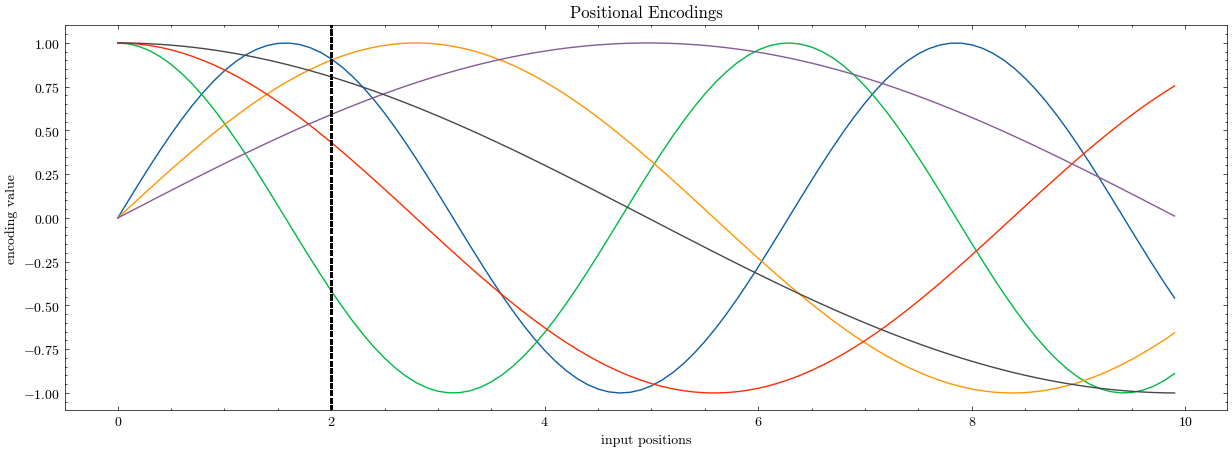

In [5]:
show_dim = [0,16,32] # visualise only a few dimensions for clarity
plt.figure(figsize=(15, 5))
for i in dimensions:
    if i in show_dim:
        plt.plot(pos,even_pos_emb[i])
        plt.plot(pos,odd_pos_emb[i])
    plt.axvline(2,linestyle='--',c='black')
plt.title("Positional Encodings")        
plt.xlabel("input positions")
plt.ylabel("encoding value")
plt.show()

## BERT-ology
- BERT, or __[Bi-Directional Encoder Representations from Transformers](https://arxiv.org/abs/1810.04805)__, was presented by Devlin et al., a team at Google AI in 2018
- Multi-task Learning: BERT also helped push the transfer-learning envelope in the NLP domain by showcasing how a pre-trained model can be fine-tuned for various tasks to provide state-of-the-art performance
- BERT tweaked the usual Language Model objective to only predict next token based on past context by building context from both directions, i.e. the objective of predicting masked words along with next sentence prediction.


<img src="./assets/bert_models_layout_notebook_3.jpeg">

> source [PLM Papers](https://github.com/thunlp/PLMpapers)

In [6]:
import torch
import transformers
from transformers import pipeline

In [7]:
# Let us define some configs/constants
DISTILBET_BASE_UNCASED_CHECKPOINT = "distilbert/distilbert-base-uncased"
DISTILBET_QA_CHECKPOINT = "distilbert/distilbert-base-uncased-distilled-squad"
DISTILBET_CLASSIFICATION_CHECKPOINT = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"

In [8]:
if torch.cuda.is_available():
    DEVICE = 'cuda'
    Tensor = torch.cuda.FloatTensor
    LongTensor = torch.cuda.LongTensor
    DEVICE_ID = 0
elif torch.backends.mps.is_available():
    DEVICE = 'mps'
    Tensor = torch.FloatTensor
    LongTensor = torch.LongTensor
    DEVICE_ID = 0
else:
    DEVICE = 'cpu'
    Tensor = torch.FloatTensor
    LongTensor = torch.LongTensor
    DEVICE_ID = -1
print(f"Backend Accelerator Device={DEVICE}")

Backend Accelerator Device=mps


### Predicting the Masked Token
This was a unique objective when BERT was originally introduced as compared to usual NLP tasks such as classification. The objective requires us to prepare a dataset where we mask a certain percentage of input tokens and train the model to learn to predict those tokens. This objective turns out to be very effective in helping the model learn the nuances of language. 

In this first task we will test the pre-trained model against this objective itself. The model outputs a bunch of things such as the predicted token, encoded index of the predicted token/word along with a score which indicates the model's confidence.

In [9]:
mlm_pipeline = pipeline(
    'fill-mask',
    model=DISTILBET_BASE_UNCASED_CHECKPOINT,
    device=DEVICE_ID
)
mlm_pipeline("Bangalore is the IT [MASK] of India.")

[{'score': 0.6093327403068542,
  'token': 3007,
  'token_str': 'capital',
  'sequence': 'bangalore is the it capital of india.'},
 {'score': 0.11960817873477936,
  'token': 9594,
  'token_str': 'hub',
  'sequence': 'bangalore is the it hub of india.'},
 {'score': 0.07699026167392731,
  'token': 2110,
  'token_str': 'state',
  'sequence': 'bangalore is the it state of india.'},
 {'score': 0.018147509545087814,
  'token': 11909,
  'token_str': 'gateway',
  'sequence': 'bangalore is the it gateway of india.'},
 {'score': 0.014192481525242329,
  'token': 4075,
  'token_str': 'headquarters',
  'sequence': 'bangalore is the it headquarters of india.'}]

In [10]:
qa_ft_pipeline = pipeline(
    'question-answering',
    model=DISTILBET_QA_CHECKPOINT,
    device=DEVICE_ID
)
qa_pt_pipeline = pipeline(
    'question-answering',
    model=#TODO: Set the pretrained 
    device=DEVICE_ID
)

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
# we use a snippet about BERT like models from the module itself
context = """The key contribution from this set of models is the masked language modeling objective during the pre-training phase, where some tokens in the input are masked, and the model is trained to predict them (we will cover these in the upcoming section). Key works in this group of architectures are BERT, RoBERTa (or optimized BERT), DistilBERT (lighter and more efficient BERT), ELECTRA and ALBERT.
In this notebook we will work through the task of Question Answering where our language model will learn to answer questions based on the context provided."""
question = "What are the key works in this set of models?"

In [12]:
ft_qa_result= qa_ft_pipeline(
    question=question,
    context=context
)

pt_qa_result= qa_pt_pipeline(
    question=question,
    context=context
)

In [13]:
print("*"*55)
print(f"Context:{context}")
print("*"*55)
print(f"Question:{question}")
print("-"*55)
print(f"Response from Fine-Tuned Model:\n{ft_qa_result}")
print()
print(f"Response from Pretrained Model:\n{pt_qa_result}")

*******************************************************
Context:The key contribution from this set of models is the masked language modeling objective during the pre-training phase, where some tokens in the input are masked, and the model is trained to predict them (we will cover these in the upcoming section). Key works in this group of architectures are BERT, RoBERTa (or optimized BERT), DistilBERT (lighter and more efficient BERT), ELECTRA and ALBERT.
In this notebook we will work through the task of Question Answering where our language model will learn to answer questions based on the context provided.
*******************************************************
Question:What are the key works in this set of models?
-------------------------------------------------------
Response from Fine-Tuned Model:
{'score': 0.01078921090811491, 'start': 294, 'end': 326, 'answer': 'BERT, RoBERTa (or optimized BERT'}

Response from Pretrained Model:
{'score': 0.00016200241225305945, 'start': 116, 'e

# Generative Pretraining

## Behold, its GPT (Generative pre-training)

The first model in this series is called GPT, or Generative Pre-Training. It was released in [2018](https://openai.com/blog/language-unsupervised/), about the same time as the BERT model. The paper presents a task-agnostic architecture based on the ideas of transformers and unsupervised learning.

- GPT is essentially a language model based on the __transformer-decoder__ 
- Introduction of large training datasets: __BookCorpus__ dataset contains over 7,000 unique, unpublished books across different genres
- The GPT architecture makes use of 12 decoder blocks (as opposed to 6 in the original transformer) with 768-dimensional states and 12 self-attention heads each.


### GPT-2
- Radford et al. presented the GPT-2 model as part of their work titled [Language Models are Unsupervised Multi-task Learners in 2019](https://d4mucfpksywv.cloudfront.net/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)
- The model achieves state-of-the-art performance in a few-shot setting
- Similar to GPT, the secret sauce for GPT-2 is its dataset. The authors prepared a massive 40 GB dataset by crawling 45 million outbound links from a social networking site called Reddit.
- The vocabulary was also expanded to cover 50,000 words and the context window was expanded to 1,024 tokens (as compared to 512 for GPT).


### GPT-3
- OpenAI published paper titled [Language Models are Few Shot Learners](https://arxiv.org/abs/2005.14165) in May 2020. 
- This paper introduces the mammoth __175 billion-parameter GPT-3 model__.
- Apart from more layers and parameters, this model made use of sparse attention
- Dataset again played a key role, a 300 billion-token dataset based on existing datasets like Common Crawl (filtered for better content), WebText2 (a larger version of WebText used for GPT-2), Books1 and Books2, and the Wikipedia dataset was prepared for this model

## Language Modeling
By far the most widely used application from the NLP world is language modeling. We use it daily on our phone keyboards, email applications and a ton of other places.

In simple words, a language model takes certain text as input context to generate the next set of words as output. This is interesting because a language model tries to understand the input context, the language structure (though in a very naive way) to predict the next word(s). We use it in the form of text completion utilities on search engines, chat platforms, emails etc. all the time. Language models are a perfect real life application of NLP and showcase the power of RNNs.

Language models can be developed train in different ways. The most common and widely used method is the sliding window approach. The model takes a small window of text as input and tried to predict the next word as the output. The following figure illustrates the same visually.

<img src="./assets/lm_training_notebook_3.png">

### PreTrained GPT2 for Text Generation

In [14]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

In [22]:
# generative tasks are not available through MPS/Apple Silicon
DEVICE = 'cpu'
Tensor = torch.FloatTensor
LongTensor = torch.LongTensor
DEVICE_ID = -1
print(f"Backend Accelerator Device={DEVICE}")

Backend Accelerator Device=cpu


In [23]:
tokenizer = AutoTokenizer.#TODO: get pretrained GPT2 tokenizer

# add the EOS token as PAD token to avoid warnings
model = AutoModelForCausalLM.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id).to(DEVICE)

In [24]:
# encode context the generation is conditioned on
model_inputs = tokenizer('The king of England is', return_tensors='pt').to(DEVICE)

# generate 40 new tokens
greedy_output = model.generate(**model_inputs, max_new_tokens=40)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output:
----------------------------------------------------------------------------------------------------
The king of England is a man of great wealth and power, and he is a man of great wealth and power. He is a man of great wealth and power. He is a man of great wealth and power. He
